In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

movies_data = pd.read_csv(r'C:\Users\battu\Desktop\DM\dataset\movies.csv', low_memory=False)
movies = movies_data[['movieId', 'title', 'directedBy', 'starring', 'genres']]

ratings = pd.read_csv(r'C:\Users\battu\Desktop\DM\dataset\training.csv', sep=',')
del ratings["timestamp"]

In [3]:
movies = movies.dropna(subset=['genres'])
movies.head()

,movieId,title,directedBy,starring,genres
0,1,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...","Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...","Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...","Comedy,Romance"
3,4,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...","Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",Comedy


In [4]:
ratings.head()

,userId,movieId,rating
0,142882,91658,2.5
1,142882,4344,1.0
2,142882,45720,2.0
3,142882,4734,2.0
4,142882,91542,2.0


In [5]:
ratings["rating"].isnull().any()

False

In [6]:
ratingCounts=ratings["movieId"].value_counts()
ratingCounts.head()

2571     42120
318      40889
79132    37947
58559    34531
2959     34290
Name: movieId, dtype: int64

In [7]:
mId = 2571

In [8]:
movies[movies["movieId"] == mId]

,movieId,title,directedBy,starring,genres
2418,2571,"Matrix, The (1999)","Andy Wachowski, Larry Wachowski","Laurence Fishburne, Keanu Reeves, Hugo Weaving...","Action,Sci-Fi,Thriller"


In [9]:
ratingsOfInterest = ratings[ratings["movieId"]==mId]
ratingsOfInterest.count()

userId     42120
movieId    42120
rating     42120
dtype: int64

In [10]:
len(ratingsOfInterest["userId"].unique().tolist())/len(ratings["userId"].unique().tolist())*100

40.2442170435979

In [11]:
ratingsOfInterest.head()

,userId,movieId,rating
418,142914,2571,3.5
498,142913,2571,4.5
1202,142905,2571,2.0
1478,142911,2571,4.0
1755,142909,2571,4.0


In [12]:
users = ratingsOfInterest["userId"].unique().tolist()
len(users)

42120

In [13]:
trainingProp = 0.7
testProp = 1-trainingProp

print("training: ", int(len(users)*trainingProp))
print("test: ", int(len(users)*testProp))

training:  29483
test:  12636


In [14]:
import random
random.shuffle(users)

In [15]:
trainingUsers = users[:int(len(users)*trainingProp)]
len(trainingUsers)

29483

In [16]:
testUsers = users[int(len(users)*trainingProp):]
len(testUsers)

12637

In [17]:
# I'm adding the movie info to the ratings now for ease of use in my clustering
ratingsPlus = ratings.merge(movies, on="movieId", how = "inner")

In [18]:
ratingsPlus.head()

,userId,movieId,rating,title,directedBy,starring,genres
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"


In [19]:
TrainingFilter = ratingsPlus["userId"].isin(trainingUsers)
ratingsForTraining = ratingsPlus[TrainingFilter]
ratingsForTraining.head()

,userId,movieId,rating,title,directedBy,starring,genres
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
9,141662,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"


In [20]:
#Here I am extracting all the genres for each movie and putting them all in a list
genreLists=movies["genres"].str.split(",")
genreList = []
# make a list of all genres mentioned, with redundancy
for movieGenres in genreLists:
    genreList.extend(movieGenres)
len(genreList)

88172

In [21]:
# this gets the unique list of genres by making it a set.
genreList = set(genreList)
print(genreList)
len(genreList)

{'Documentary', 'Adventure', 'IMAX', 'Drama', 'Animation', 'Sci-Fi', 'Children', 'War', 'Action', 'Western', 'Crime', 'Film-Noir', 'Devon Libran', 'Mystery', 'Fantasy', 'Musical', 'Comedy', 'Thriller', 'Horror', 'Romance'}


20

In [22]:
compute = False

# This is a really computationally intensive loop, so I will only run it if I need to.
# If compute is false, it reads it from the file instead of recomputing everything.
if compute:
    userDicts = []
    userIds = []
    for thisUser in trainingUsers:
        thisUserDict = {}
        thisUsersRatings = ratingsForTraining[ratingsForTraining["userId"] == thisUser]
        #print(thisUsersRatings[["userId", "rating", "title"]])
        for genre in genreList:
            genreFilter = thisUsersRatings["genres"].str.contains(genre)
            avgRating = thisUsersRatings[genreFilter]["rating"].mean()
            thisUserDict[genre]=avgRating
        userDicts.append(thisUserDict)
        userIds.append(thisUser)
    df = pd.DataFrame(userDicts, index = userIds)
    df.to_csv('dataset/TrainingDf.csv')
else:
    df= pd.read_csv('dataset/TrainingDf.csv', index_col = 0)

In [23]:
dfNoNan=df.replace(np.nan,0)

In [24]:
nClusters= 100
kmeans = KMeans(n_clusters=nClusters).fit(dfNoNan)

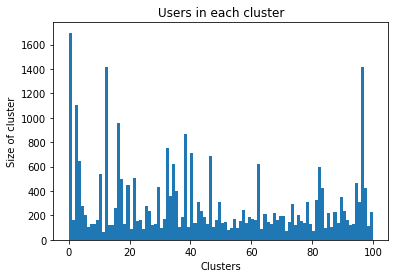

In [25]:
plt.hist(kmeans.labels_, nClusters, [0,nClusters])
plt.title("Users in each cluster")
plt.ylabel("Size of cluster")
plt.xlabel("Clusters")
plt.show()

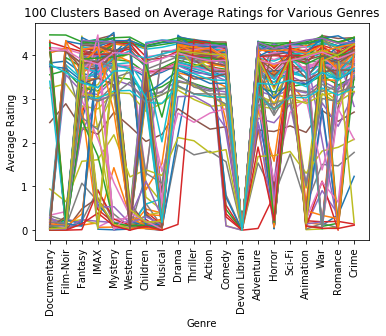

In [26]:
fig, ax = plt.subplots()
ax.plot(kmeans.cluster_centers_.T)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_xticks(range(len(dfNoNan.columns)))
ax.set_xticklabels(dfNoNan.columns)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=90)
ax.set_title("%d Clusters Based on Average Ratings for Various Genres" %nClusters)

plt.show()

In [27]:
dfNoNan.describe()

,Documentary,Film-Noir,Fantasy,IMAX,Mystery,Western,Children,Musical,Drama,Thriller,Action,Comedy,Devon Libran,Adventure,Horror,Sci-Fi,Animation,War,Romance,Crime
count,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000,29483.000000
mean,1.456103,1.625025,3.504794,3.439773,3.521459,2.229577,3.011147,2.144561,3.898612,3.819324,3.763119,3.569113,0.000068,3.684438,2.971120,3.757724,3.104656,3.576610,3.489998,3.848228
std,1.907208,1.958409,1.130694,1.278423,1.298544,1.952787,1.506639,1.870193,0.633313,0.598559,0.618186,0.939647,0.011648,0.779620,1.545263,0.642640,1.534272,1.277824,1.160547,0.839139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.220000,3.166667,3.388889,0.000000,2.625000,0.000000,3.622222,3.500000,3.414703,3.285714,0.000000,3.361987,2.500000,3.402174,2.818182,3.400000,3.250000,3.583333
50%,0.000000,0.000000,3.750000,3.750000,3.875000,3.000000,3.500000,2.944444,3.964912,3.863636,3.812500,3.714286,0.000000,3.785714,3.500000,3.812500,3.642857,3.933333,3.750000,4.000000
75%,3.531582,3.800000,4.166667,4.224138,4.250000,4.000000,4.000000,3.833333,4.272727,4.207893,4.178571,4.100000,0.000000,4.155364,4.000000,4.180278,4.091507,4.333333,4.142857,4.333333
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [28]:
annotatedDf=dfNoNan
annotatedDf["cluster"]=kmeans.labels_

In [29]:
userCluster = annotatedDf["cluster"]

In [30]:
Reviews=ratingsForTraining[["userId", "rating"]][ratingsForTraining["movieId"]==mId]
indexedReviews = Reviews.set_index("userId")

In [31]:
indexedReviews["cluster"]=userCluster

In [32]:
clusterRatings = indexedReviews[["rating", "cluster"]].groupby("cluster").mean()
clusterRatings.head()

,rating
cluster,
0.0,4.184783
1.0,4.096639
2.0,4.218954
3.0,3.946389
4.0,3.740113


In [33]:
avgRating = indexedReviews["rating"].mean()
avgRating

4.110351728114507

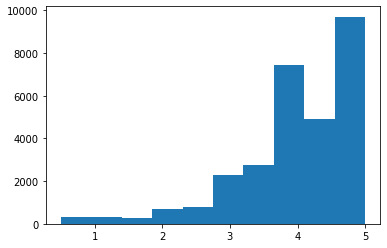

In [34]:
plt.hist(indexedReviews["rating"])
plt.show()

In [35]:
TestFilter = ratingsPlus["userId"].isin(testUsers)
ratingsForTest = ratingsPlus[TestFilter]
ratingsForTest.head()

,userId,movieId,rating,title,directedBy,starring,genres
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
5,142694,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
6,142850,91658,3.5,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
8,142834,91658,3.5,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"
10,142789,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","Drama,Thriller"


In [36]:
if compute:
    userDicts = []
    userIds = []
    for thisUser in testUsers:
        thisUserDict = {}
        thisUsersRatings = ratingsForTest[ratingsForTest["userId"] == thisUser]
        for genre in genreList:
            genreFilter = thisUsersRatings["genres"].str.contains(genre)
            avgRating = thisUsersRatings[genreFilter]["rating"].mean()
            thisUserDict[genre]=avgRating
        userDicts.append(thisUserDict)
        userIds.append(thisUser)
    df2 = pd.DataFrame(userDicts, index = userIds)
    df2.to_csv('dataset/TestingDf.csv')
else:
    df2= pd.read_csv('dataset/TestingDf.csv', index_col = 0)

In [37]:
df2NoNan=df2.replace(np.nan,0)
df2NoNan.head()

,Documentary,Film-Noir,Fantasy,IMAX,Mystery,Western,Children,Musical,Drama,Thriller,Action,Comedy,Devon Libran,Adventure,Horror,Sci-Fi,Animation,War,Romance,Crime
107822,0.000000,0.000000,3.000000,3.500000,5.000000,0.000000,4.125000,0.000000,3.833333,4.000000,3.000000,3.250000,0.0,3.416667,5.000000,3.500000,4.125000,3.500000,3.000000,0.000000
205577,0.000000,0.000000,4.769231,4.800000,4.500000,0.000000,4.800000,0.000000,4.400000,4.550000,4.595238,4.500000,0.0,4.764706,0.000000,4.687500,4.375000,5.000000,4.333333,4.625000
132373,4.136364,4.185714,3.857143,3.020833,4.136905,3.952381,4.086957,3.693548,3.856452,3.906417,3.688525,3.722591,0.0,3.758065,3.512195,3.602151,3.971831,4.050000,3.761628,4.064189
164045,0.000000,4.750000,3.869565,4.000000,4.068966,3.750000,3.750000,3.666667,3.750000,4.000000,3.971429,3.862500,0.0,3.890625,4.190476,3.972222,3.666667,2.833333,3.208333,4.250000
120306,0.000000,0.000000,4.750000,4.500000,0.000000,0.000000,0.000000,0.000000,4.222222,4.250000,3.600000,4.625000,0.0,4.000000,0.000000,4.250000,0.000000,3.375000,4.625000,4.166667


In [38]:
predictions = kmeans.predict(df2NoNan)

In [39]:
testData = pd.DataFrame()
testData = df2NoNan
testData["cluster"] = predictions
#pd.Series(predictions)

In [40]:
testData.head()

,Documentary,Film-Noir,Fantasy,IMAX,Mystery,Western,Children,Musical,Drama,Thriller,...,Comedy,Devon Libran,Adventure,Horror,Sci-Fi,Animation,War,Romance,Crime,cluster
107822,0.000000,0.000000,3.000000,3.500000,5.000000,0.000000,4.125000,0.000000,3.833333,4.000000,...,3.250000,0.0,3.416667,5.000000,3.500000,4.125000,3.500000,3.000000,0.000000,10
205577,0.000000,0.000000,4.769231,4.800000,4.500000,0.000000,4.800000,0.000000,4.400000,4.550000,...,4.500000,0.0,4.764706,0.000000,4.687500,4.375000,5.000000,4.333333,4.625000,35
132373,4.136364,4.185714,3.857143,3.020833,4.136905,3.952381,4.086957,3.693548,3.856452,3.906417,...,3.722591,0.0,3.758065,3.512195,3.602151,3.971831,4.050000,3.761628,4.064189,96
164045,0.000000,4.750000,3.869565,4.000000,4.068966,3.750000,3.750000,3.666667,3.750000,4.000000,...,3.862500,0.0,3.890625,4.190476,3.972222,3.666667,2.833333,3.208333,4.250000,2
120306,0.000000,0.000000,4.750000,4.500000,0.000000,0.000000,0.000000,0.000000,4.222222,4.250000,...,4.625000,0.0,4.000000,0.000000,4.250000,0.000000,3.375000,4.625000,4.166667,58


In [41]:
testAssignments = pd.DataFrame({"cluster": testData["cluster"]})
#testAssignments.head()

In [42]:
testAssignments.insert(1,"ratingPredict", testAssignments["cluster"]*0)

In [43]:
for i in range(len(testAssignments)):
    testAssignments["ratingPredict"].iloc[i]=clusterRatings.loc[testAssignments["cluster"].iloc[i]]["rating"]

C:\Users\battu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
testAssignments["userId"]=testAssignments.index
testAssignments.head()

,cluster,ratingPredict,userId
107822,10,3.958869,107822
205577,35,4.429889,205577
132373,96,4.324949,132373
164045,2,4.218954,164045
120306,58,4.074468,120306


In [45]:
TestReviews=ratingsForTest[["userId", "rating"]][ratingsForTest["movieId"]==mId]

In [46]:
testPredictTrue = testAssignments.merge(TestReviews, on="userId")

In [47]:
testPredictTrue["defaultPredict"]=avgRating
testPredictTrue.head()

,cluster,ratingPredict,userId,rating,defaultPredict
0,35,4.429889,205577,5.0,4.110352
1,96,4.324949,132373,5.0,4.110352
2,33,4.435849,117808,5.0,4.110352
3,10,3.958869,141933,5.0,4.110352
4,40,4.600000,157064,5.0,4.110352


In [48]:
# calculating rmse error between actual rating and ratingPredicted
predictScore = np.sqrt(((testPredictTrue["ratingPredict"]-testPredictTrue["rating"])**2).mean())
print(predictScore)

0.8556098451515987


In [49]:
# calculating rmse error between actual ratig and default prediction
defaultScore = np.sqrt(((testPredictTrue["rating"]-testPredictTrue["defaultPredict"])**2).mean())
print(defaultScore)

0.9420421598620297


In [50]:
print("% improvement: ",(defaultScore-predictScore)/defaultScore*100)

% improvement:  9.174994325422736


In [51]:
clusterTestRatings = testPredictTrue[["rating", "cluster"]].groupby("cluster").mean()

In [52]:
TestReviews=ratingsForTest[["userId", "rating"]][ratingsForTest["movieId"]==mId]

   training ratings  test ratings
0          4.184783      4.226415
1          4.096639      4.225000
2          4.218954      4.166667
3          3.946389      3.869318
4          3.740113      3.365854
                  training ratings  test ratings
training ratings           1.00000       0.95514
test ratings               0.95514       1.00000


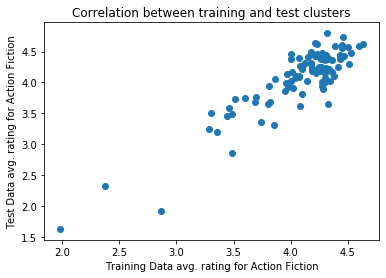

In [53]:
index=range(0,5)
column_names = ['training ratings', 'test ratings']
df_pred = pd.DataFrame(index = index, columns = column_names)
df_pred['training ratings'] = clusterRatings
df_pred['test ratings'] = clusterTestRatings
print(df_pred.head())
print(df_pred.corr())
plt.scatter(clusterRatings, clusterTestRatings)
plt.title("Correlation between training and test clusters")
plt.xlabel("Training Data avg. rating for Action Fiction")
plt.ylabel("Test Data avg. rating for Action Fiction")
plt.show()

In [55]:
testPredictTrue.describe()

,cluster,ratingPredict,userId,rating,defaultPredict
count,3771.000000,3771.000000,3771.000000,3771.000000,3.771000e+03
mean,43.642270,4.104595,145944.291435,4.095068,4.110352e+00
std,31.834612,0.370208,34147.580596,0.942043,3.650897e-13
min,0.000000,1.987500,100006.000000,0.500000,4.110352e+00
25%,16.000000,3.974874,116565.000000,3.500000,4.110352e+00
50%,38.000000,4.184783,136175.000000,4.000000,4.110352e+00
75%,73.000000,4.324949,176931.500000,5.000000,4.110352e+00
max,99.000000,4.629397,206976.000000,5.000000,4.110352e+00


In [56]:
# another way of calculating rmse
from sklearn.metrics import mean_squared_error
import math

y_true = testPredictTrue["rating"]
y_pred = testPredictTrue["ratingPredict"]
mse = mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)

print(rmse)

0.8556098451515993
